<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# Metop-C/B IASI - Ammonia (NH<sub>3</sub>) - Level 2

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/iasi) is an instrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species. AERIS implemented the IASI portal, which provides access to Level 2 products from IASI for several species, including Carbon monoxide, Ozone, and Ammonia (NH3). Ammonia is a highly reactive and soluble alkaline gas. It originates mainly from both, natural and anthropogenic sources, with the main source being agriculture.
 
This notebook shows you how you can load, browse and visualize Total Column Ammonia (NH<sub>3</sub>) Level 2 from the IASI instrument. It features data from 2 June 2022 and shows two major ammonia sources in Asia, over the Indo-Gangetic Plain (IGP) and the Norht China Plain (NCP).

### Basic Facts

> **Spatial resolution**: `4 x 12 km coverage close to the centre of a 48 x 48 km2 cell (average sampling distance: 24 km` <br>
> **Spatial coverage**: `Near global` <br>
> **Revisit time**:  `less than 1 day` <br>
> **Data availability**: `since 2007`


### How to access the data

IASI Level 2 data are disseminated in netCDF format and can be downloaded via the [IASI portal](https://iasi.aeris-data.fr/).

### This module has the following outline:
* [1 - Load and browse Metop-B IASI Level 2 data](#load)
* [2 - Mask Metop-B IASI Level 2 data](#masking)

<hr>

#### Load required libraries

In [1]:
import requests
import xarray as xr

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id="load"></a>Download, load and browse Metop-A IASI Level 2 products

[OPTIONAL]: Metop-A/B IASI Total Column Ammonia (NH<sub>3</sub>) Level 2 data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format. You can either download the files directly from the website or you can download them programmatically with the help of the `requests` library. It first requests the data from the website via a https link and then writes the response into a netcdf file. This step is optional, as the data has already been downloaded.

In [6]:
#rb = requests.get('https://cds-espri.ipsl.upmc.fr/iasibl2/iasi_nh3/V3.1.0/2022/06/IASI_METOPB_L2_NH3_20220602_ULB-LATMOS_V3.1.0.nc')
#open('../../eodata/acam_training_school/IASI/iasi_metopb_nh3_20220602.nc', 'wb').write(rb.content)

15124640

### Load netCDF data with `xarray`

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure of the `IASI Level 2 data product`. You see that the data is a one-dimensional vector with more than 1 Million individual data points. `latitude`, `longitude` and other parameters are stored as individual data variables.

In [3]:
file_name_2b = '../../eodata/acam_training_school/IASI/iasi_metopb_nh3_20220602.nc'
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:                       (time: 1190717)
Coordinates:
  * time                          (time) float64 4.865e+08 ... 4.866e+08
Data variables: (12/14)
    time_string                   (time) |S16 ...
    time_in_day                   (time) float64 ...
    latitude                      (time) float32 ...
    longitude                     (time) float32 ...
    solar_zenith_angle            (time) float32 ...
    satellite_zenith_angle        (time) float32 ...
    ...                            ...
    pixel_number                  (time) int16 ...
    ifov_number                   (time) int16 ...
    AMPM                          (time) int16 ...
    cloud_coverage                (time) float32 ...
    nh3_total_column              (time) float32 ...
    nh3_total_column_uncertainty  (time) float32 ...
Attributes: (12/26)
    title:                       Near-real time daily IASI/Metop-B ULB-LATMOS...
    institution:                 ULB-LATMOS
    product_version:             3.1.0
    history:                     2022-10-07 14:40:05 - Product generated with...
    summary:                     This dataset contains Level-2 ammonia total ...
    source:                      EUMETSAT IASI Level 1C data (version 4 up to...
    ...                          ...
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_name:                L. Clarisse (lclariss@ulb.ac.be), M. Van Dam...
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

### Generate a `xarray.DataArray` with latitude and longtiude as coordinates

With the help of the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `column` information as data values. This data structure will be helpful for plotting and masking the data.

In [4]:
nh3=file_2b['nh3_total_column']
nh3_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=nh3, 
                                    parameter_name='nh3', 
                                    longname=nh3.long_name,
                                    no_of_dims=1, 
                                    unit=nh3.units)
nh3_da_2b

<xarray.DataArray 'nh3' (ground_pixel: 1190717)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 59.25 59.42 59.37 ... 45.79 45.75 45.91
    longitude  (ground_pixel) float32 -47.06 -47.15 -47.49 ... 148.5 148.7 148.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieved ammonia total column in mole per square metre
    units:      mol m-2

### Visualize the Metop-B IASI Level 2 data

The next step is to visualize the generated `xarray.DataArray`. You can use the [visualize_scatter](../functions.ipynb#visualize_scatter) function, that plots data points as a scatter plot.

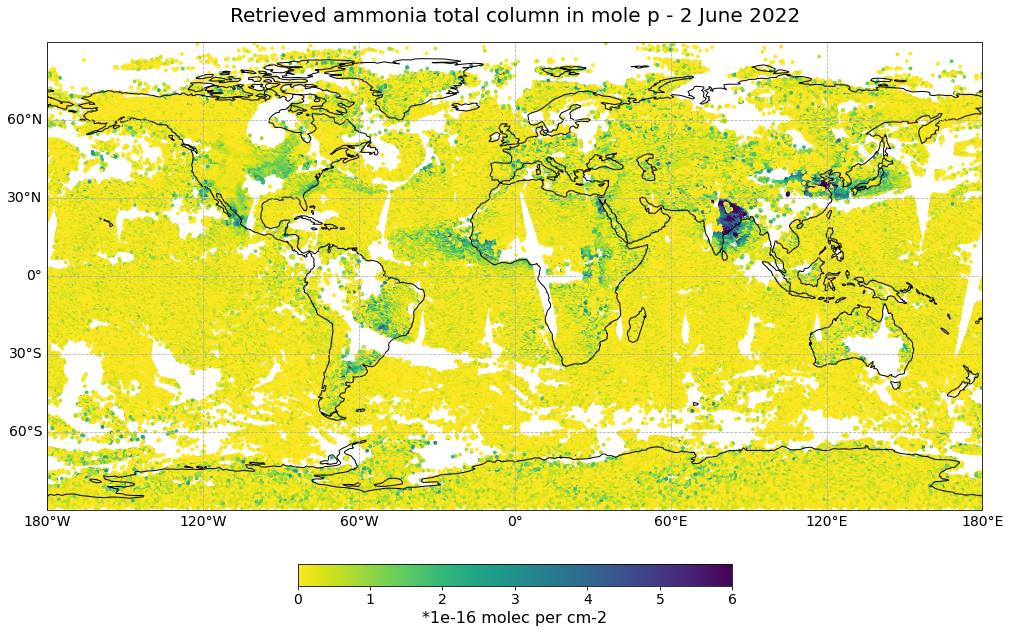

In [7]:
visualize_scatter(xr_dataarray=nh3_da_2b*nh3.multiplication_factor_to_convert_to_molecules_per_cm2, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=6, 
                  point_size=8,
                  color_scale='viridis_r', 
                  unit='*1e-16 molec per cm-2', 
                  title=nh3_da_2b.long_name[0:40] + ' - 2 June 2022')

## <a id='masking'></a>Mask Metop-A IASI Level 2 data products

The IASI Level 2 data files provide you information on the Cloud Cover for each ground pixel. This information is useful to generate a cloud mask and to mask out data points with a cloud cover exceeding a specific threshold.

In order to do so, you have to load the cloud cover information `CLcov` from the data file. You can use the [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) function again.

In [8]:
cloudCov = file_2b['cloud_coverage']
cloudCov

<xarray.DataArray 'cloud_coverage' (time: 1190717)>
[1190717 values with dtype=float32]
Coordinates:
  * time     (time) float64 4.865e+08 4.865e+08 ... 4.866e+08 4.866e+08
Attributes:
    long_name:  Cloud coverage in the on ground pixel
    units:      %

In [9]:
cloudCov = file_2b['cloud_coverage']
nh3_mask_2b = generate_xr_from_1D_vec(file=file_2b, 
                                      lat_path='latitude', 
                                      lon_path='longitude', 
                                      variable=cloudCov, 
                                      parameter_name='Cloud cover', 
                                      longname=cloudCov.long_name, 
                                      no_of_dims=1, 
                                      unit=cloudCov.units)
nh3_mask_2b

<xarray.DataArray 'Cloud cover' (ground_pixel: 1190717)>
array([72.04, 88.01, 87.73, ..., 58.76, 72.88, 74.77], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 59.25 59.42 59.37 ... 45.79 45.75 45.91
    longitude  (ground_pixel) float32 -47.06 -47.15 -47.49 ... 148.5 148.7 148.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud coverage in the on ground pixel
    units:      %

### Mask the `xarray.DataArray` with the `generate_masked_array` function

The cloud cover information can now be used to mask the `xarray.DataArray`. You can make use of the function [generate_masked_array](../functions.ipynb#generate_masked_array), where you can set a threshold. All data points with a cloud coverage beyond this threshold are masked out.
Let us mask out all ground pixels with a cloud cover with more than 20%.

You see that the number of data points reduced to just a bit more than 100,000 instead of more than 600,000. With the [visualize_scatter](../functions.ipynb#visualize_scatter) function, you can visualize the masked array.

In [11]:
nh3_2b_masked = generate_masked_array(xarray=nh3_da_2b,
                                      mask=nh3_mask_2b, 
                                      threshold=20, 
                                      operator='<',
                                      drop=True)
nh3_2b_masked

<xarray.DataArray (ground_pixel: 379287)>
array([ 1.26254847e-04, -1.34836755e-05,  4.19790391e-04, ...,
        1.56306196e-04, -3.63408944e-05, -1.46876977e-04], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 55.96 55.99 56.55 ... 46.01 45.21 44.04
    longitude  (ground_pixel) float32 -63.56 -64.29 -62.42 ... 154.1 155.6 158.5
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieved ammonia total column in mole per square metre
    units:      mol m-2

In [12]:
visualize_scatter(xr_dataarray=nh3_2b_masked*nh3.multiplication_factor_to_convert_to_molecules_per_cm2, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=6,
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_2b_masked.units, 
                  title=nh3_2b_masked.long_name)

<br>

<hr>

### References

* IASI is a joint mission of EUMETSAT and the Centre National d’Etudes Spatiales (CNES, France). The authors acknowledge the AERIS data infrastructure for providing access to the IASI data in this study, ULB-LATMOS for the development of the retrieval algorithms, and Eumetsat/AC SAF for CO data production

* Some code in this notebook was adapted from the following source:

  * origin: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/232_Metop-AB_IASI_CO_L2_load_browse.ipynb
  * copyright: 2022, EUMETSAT
  * license: MIT
  * retrieved: 2022-06-28 by Sabrina Szeto

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>